<a href="https://colab.research.google.com/github/anderson-ferreira-83/Data_Science_Repo_anderson83/blob/main/2_Data_mining/Dados_do_Censo_anderson83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset:

**Project:** Census Data Analysis

**Data Source:** UCI Machine Learning Repository

**Link:** https://archive.ics.uci.edu/ml/datasets/Adult

This project uses a census dataset to explore data mining techniques and supervised learning models.

In [ ]:
# Connect to Google Drive to access data saved in the cloud
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to the data
import os

In [ ]:
#
path = '/content/drive/MyDrive/8_PORTFOLIO_GITHUB_PROJECTS/Karine_cristina_Data_Science/Data_Science-master/Projeto minerando dados'

In [ ]:
# Changing the directory
os.chdir(path)

In [ ]:
# Check available files in the current directory
!ls

adult.data  Dados_do_Censo_anderson83.ipynb  Dados_do_Censo.ipynb  Dados_do_Censo.py  modelo.sav


# Importing modules

In [ ]:
# Libraries for data manipulation and visualization
import pandas as pd  # Data manipulation and analysis
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting
from matplotlib import style  # Plot style
from warnings import simplefilter  # Filter for unnecessary warnings

In [ ]:
# Libraries for preprocessing and model selection
from sklearn import model_selection  # Tools for model selection and cross-validation
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encoding and scaling variables
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_predict  # Stratified splitting, optimization, and cross-prediction


In [ ]:
# Supervised learning models
from sklearn.pipeline import Pipeline  # Pipeline construction for transforming data and applying models
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors Classification
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classification
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes Classification

In [ ]:
# Metrics for model performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Accuracy, confusion matrix, and classification report
# Library to save and load trained models
import pickle  # Python object serialization

# Style and warning filter settings
style.use('ggplot')  # Apply 'ggplot' style to plots
simplefilter(action='ignore', category=FutureWarning)  # Ignore warnings about future versions



In [ ]:
# %matplotlib inline  # Displaying plots inline in Jupyter notebooks

# Loading and visualizing the data

In [ ]:
# Load census data into a DataFrame with efficient reading in chunks
df = pd.DataFrame()
for chunk in pd.read_csv('adult.data',na_values= '?', chunksize = 100000):
    df = pd.concat([df,chunk])

In [ ]:
# View the first few rows of the DataFrame for an overview of the data
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


# Data Dictionary

## Features

- **age**: Age.
- **workclass**: Work class. Indicates if the person is a public servant, self-employed, entrepreneur, etc.
- **education**: Education levels.
- **education-num**: Code for education levels.
- **marital-status**: Marital status.
- **occupation**: Occupation (e.g., Tech support, Craft repair, Other service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed Forces).
- **relationship**: Relationship (e.g., Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried).
- **race**: Race (e.g., Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other).
- **sex**: Gender (e.g., Female, Male).
- **capital-gain**: Capital gain.
- **capital-loss**: Capital loss.
- **hours-per-week**: Hours worked per week.
- **native-country**: Native country (e.g., United States, Cambodia, England, Puerto Rico, Canada, Germany, USA (Guam-USVI-etc), India, Mexico, Portugal, etc).


# Column information

In [ ]:
# General information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       46033 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   sex              48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   47985 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [ ]:
# Descriptive statistics of numerical variables
df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Chategorial variables
df.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


# Exploratory Analysis

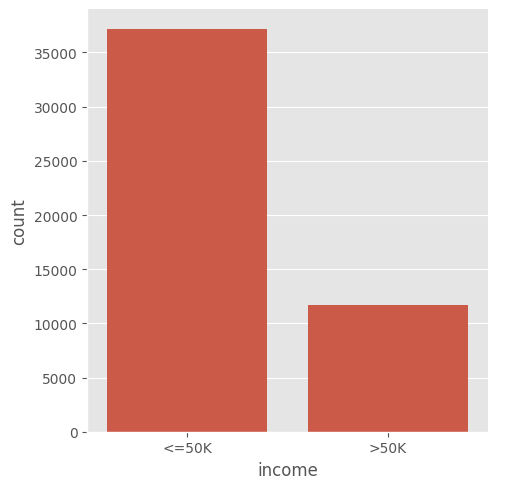

In [ ]:
# Class distribution
sns.catplot(x='income',kind='count',data=df,orient="h")

In [ ]:
#
df['income'].value_counts()

,count
income,
<=50K,37155
>50K,11687


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '11th'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, 'Assoc-acdm'),
  Text(3, 0, 'Some-college'),
  Text(4, 0, '10th'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, '7th-8th'),
  Text(7, 0, 'Bachelors'),
  Text(8, 0, 'Masters'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, '5th-6th'),
  Text(11, 0, 'Assoc-voc'),
  Text(12, 0, '9th'),
  Text(13, 0, '12th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

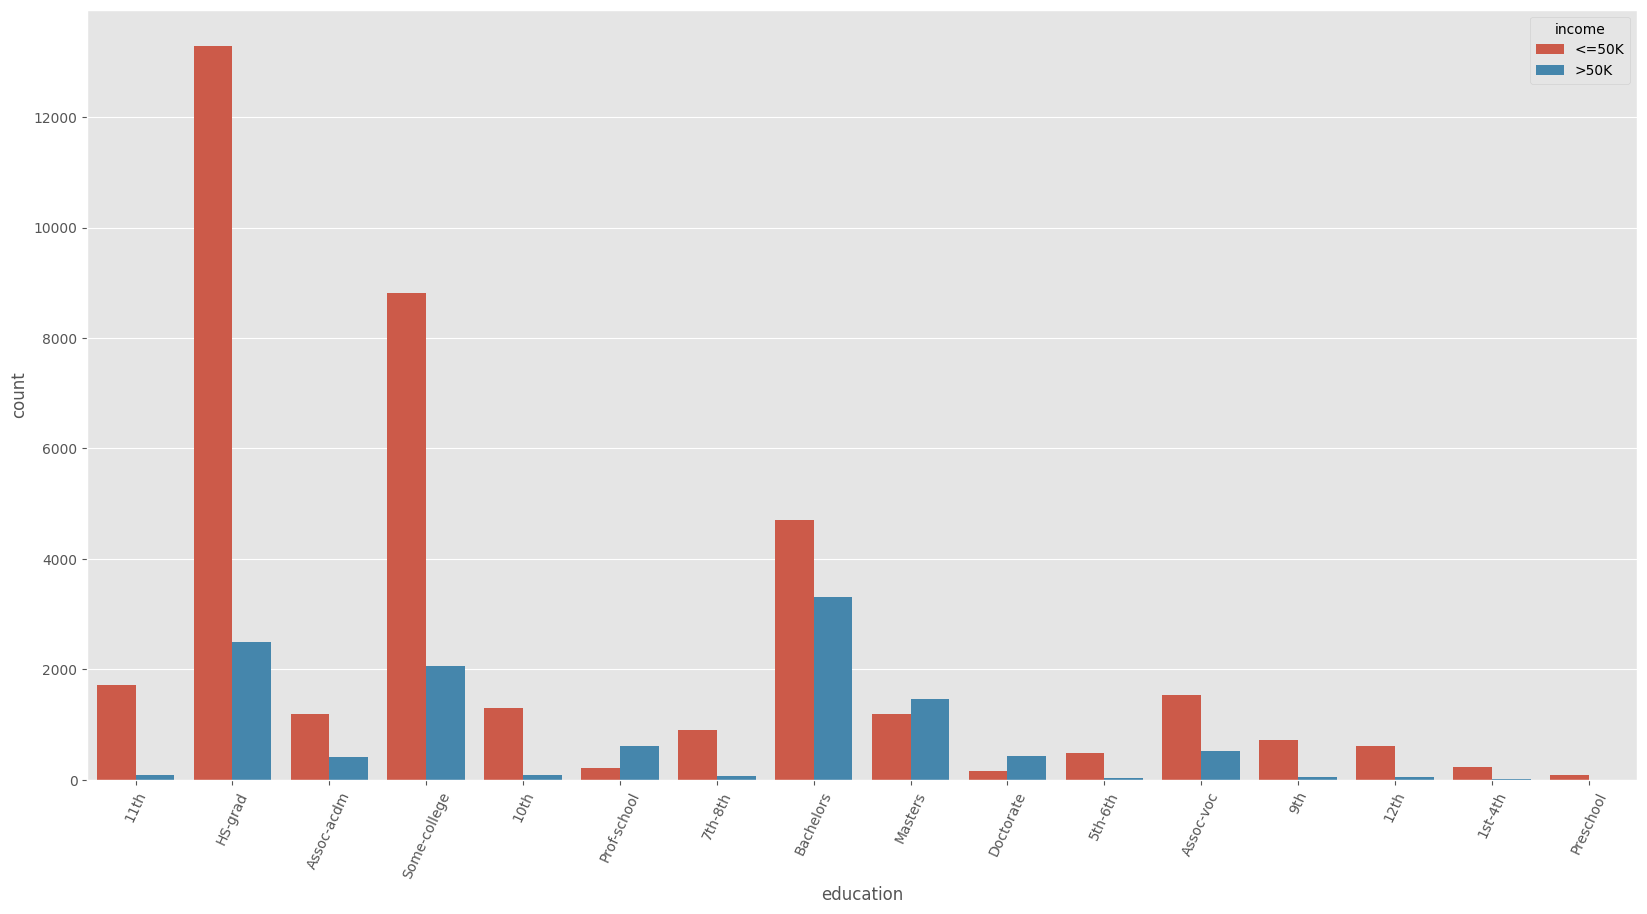

In [ ]:
# Distribution of classes by level of education
plt.figure(figsize=(20,10))
sns.countplot(data=df, x = 'education',  hue = 'income')
plt.xticks(rotation=65)

In [ ]:
#
df['education'].value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [ ]:
# Verificando a menor e a maior jornada de trabalho.
print(df['hours-per-week'].min())
print(df['hours-per-week'].max())

1
99


([0, 1, 2], [Text(0, 0, 'short'), Text(1, 0, 'normal'), Text(2, 0, 'extra')])

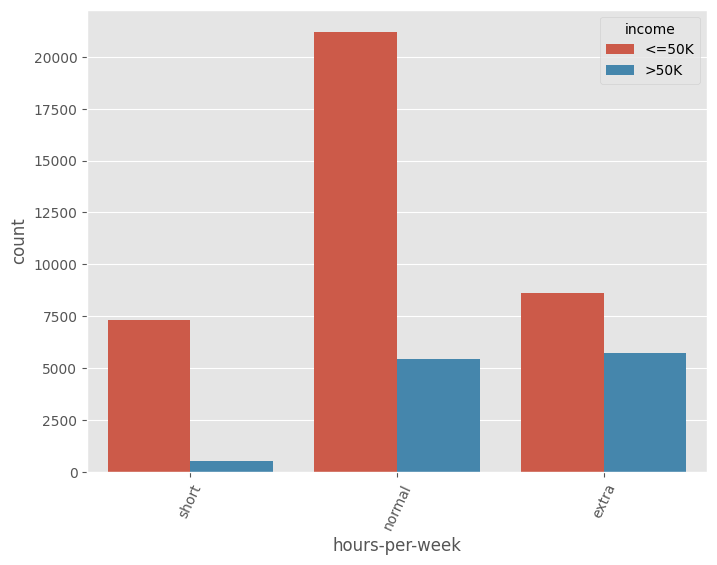

In [ ]:
# For a better visualization, we will group the hours worked into 3 categories:
# 0-30 (short shift)
# 30-40 (normal shift)
# 40-100 (extra shift)

df['hours-per-week'] = pd.cut(df['hours-per-week'],[0,30,40,100], labels =['short','normal','extra'])

# Distribution of classes by hours worked
plt.figure(figsize=(8,6))
sns.countplot(data=df, x = 'hours-per-week',  hue = 'income')
plt.xticks(rotation=65)

In [ ]:
#
df['hours-per-week'].value_counts()

,count
hours-per-week,
normal,26639
extra,14352
short,7851


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Machine-op-inspct'),
  Text(1, 0, 'Farming-fishing'),
  Text(2, 0, 'Protective-serv'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Prof-specialty'),
  Text(5, 0, 'Craft-repair'),
  Text(6, 0, 'Adm-clerical'),
  Text(7, 0, 'Exec-managerial'),
  Text(8, 0, 'Tech-support'),
  Text(9, 0, 'Sales'),
  Text(10, 0, 'Priv-house-serv'),
  Text(11, 0, 'Transport-moving'),
  Text(12, 0, 'Handlers-cleaners'),
  Text(13, 0, 'Armed-Forces')])

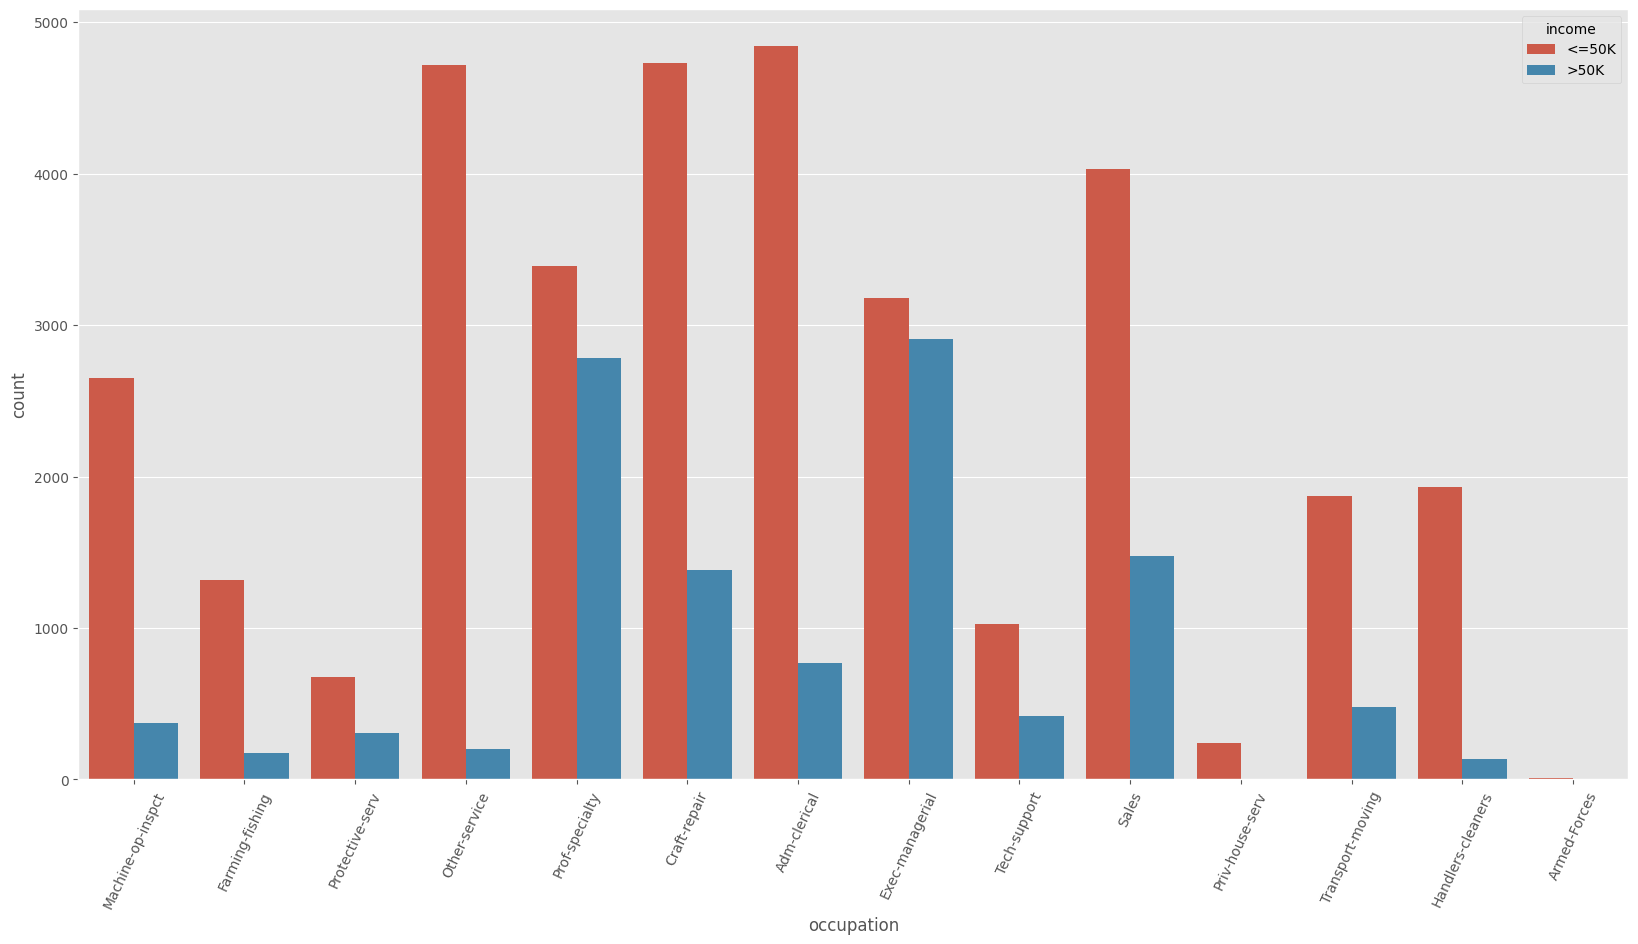

In [ ]:
# Distribution of classes according to occupation
plt.figure(figsize=(20,10))
sns.countplot(data=df, x = 'occupation',  hue = 'income')
plt.xticks(rotation=65)

In [ ]:
#
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


# Relationship of the age, sex and race columns with the income column.

<Axes: xlabel='count', ylabel='sex'>

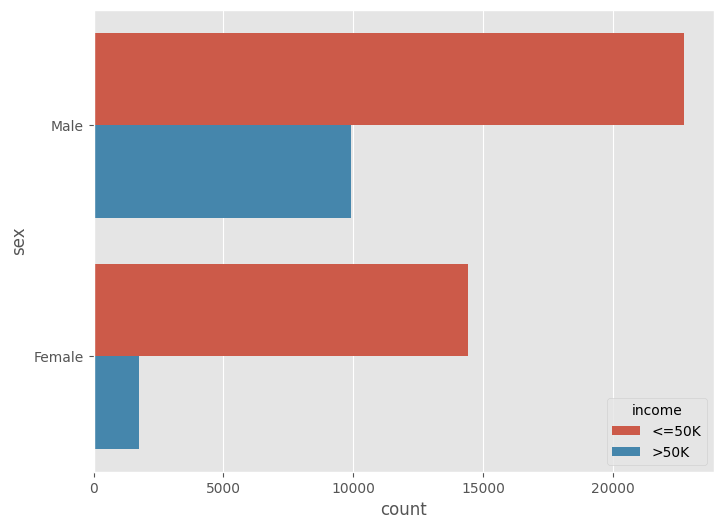

In [ ]:
#
plt.figure(figsize=(8,6))
sns.countplot(y="sex", hue='income', data=df)

<Axes: xlabel='count', ylabel='race'>

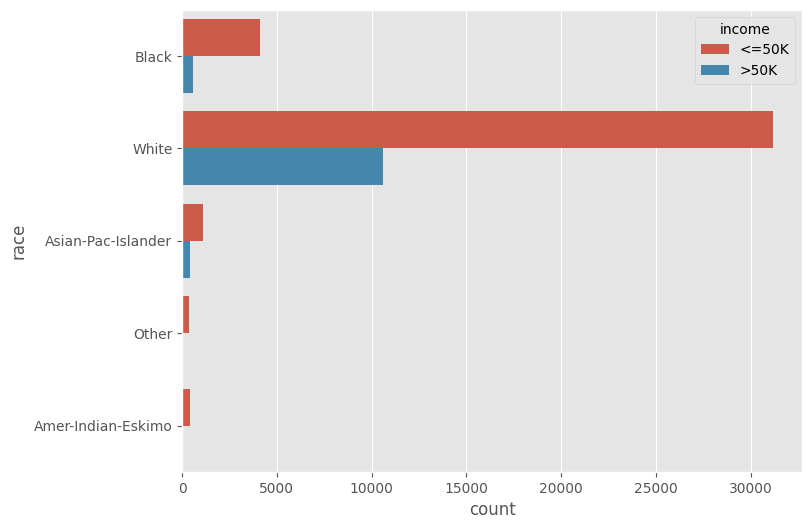

In [ ]:
#
plt.figure(figsize=(8,6))
sns.countplot(y="race", hue='income', data=df)

In [ ]:
# Checking the minimum and maximum age of the dataset.
print(f'Minimum age is: {df.age.min()} years')
print(f'Maximum age is: {df.age.max()} years')

Minimum age is: 17 years
Maximum age is: 90 years


([0, 1, 2], [Text(0, 0, 'young'), Text(1, 0, 'adult'), Text(2, 0, 'old')])

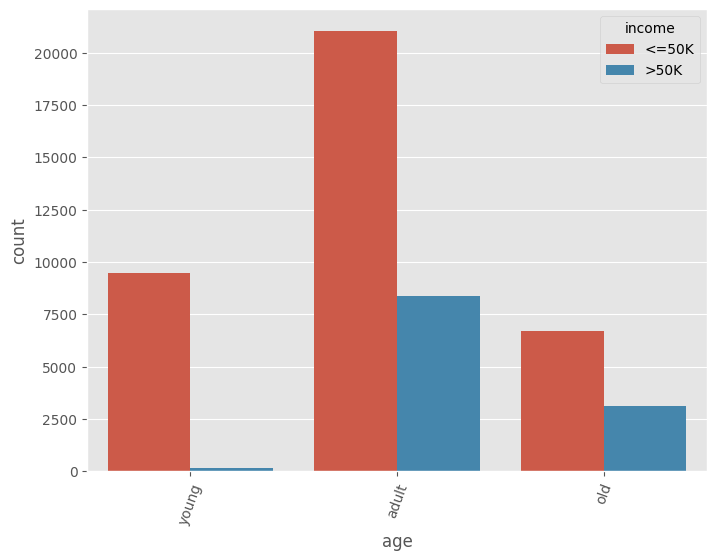

In [ ]:
# For a better visualization, we will group the ages into 3 categories:
# 0-25 years (young people)
# 25-50 years (adults)
# 50-100 years (elderly people)
df['age'] = pd.cut(df['age'],[0,25,50,100], labels =['young','adult','old'])

# Checking how the distribution turned out.
plt.figure(figsize=(8,6))
sns.countplot(data=df, x = 'age', hue = 'income')
plt.xticks(rotation=70)

# Data Analysis

In [ ]:
# Checking the number of null values ​​in the dataset.
total = df.isnull().sum().sort_values(ascending=False)
percent = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
missing_data[missing_data['percent']!=0]

,total,percent
occupation,2809,0.057512
workclass,2799,0.057307
native-country,857,0.017546


In [ ]:
# Filling the 'workclass' column with null values.
top = 'Private'
df['workclass'] = df['workclass'].fillna(top)

In [ ]:
# Filling null values ​​in the 'occupation' column.
top = 'United-States'
df['occupation'] = df['occupation'].fillna(top)

In [ ]:
# Filling null values ​​in the 'native-country' column.
top = 'Prof-specialty'
df['native-country'] = df['native-country'].fillna(top)

In [ ]:
# Checking if there are still null values ​​in the Dataset.
if df.isnull().sum().sort_values(ascending=False).any() != 0:
  print(f'Are there null values ​​in the dataset? {True}')
else:
  print(f'Are there null values ​​in the dataset? {False}')

Are there null values ​​in the dataset? False


In [ ]:
# Creating a new column with the final income.
df['capital_last'] = df['capital-gain'] - df['capital-loss']

In [ ]:
# Removing irrelevant features.
# The 'educational-num' column is filled with the code for each level of education, so we can delete the 'education' column.
# The 'capital-gain' and 'capital-loss' columns are represented by the new column we created earlier.
def remove_features(list_features):
  for i in list_features:
    df.drop(i, axis=1, inplace=True)
remove_features(['capital-gain','capital-loss','education'])

In [ ]:
# Transforming categorical variables into numeric ones.
cols = df[df.select_dtypes(['object']).columns]

for c in cols:
    encoding = LabelEncoder()
    encoding.fit(list(df[c].values))
    df[c] = encoding.transform(list(df[c].values))
df = pd.get_dummies(df)

In [ ]:
df.head()

,workclass,educational-num,marital-status,occupation,relationship,race,sex,native-country,income,capital_last,age_young,age_adult,age_old,hours-per-week_short,hours-per-week_normal,hours-per-week_extra
0,3,7,4,6,3,2,1,39,0,0,True,False,False,False,True,False
1,3,9,2,4,0,4,1,39,0,0,False,True,False,False,False,True
2,1,12,2,10,0,4,1,39,1,0,False,True,False,False,True,False
3,3,10,2,6,0,2,1,39,1,7688,False,True,False,False,True,False
4,3,10,4,14,3,4,0,39,0,0,True,False,False,True,False,False


# Correlation matrix

<Axes: >

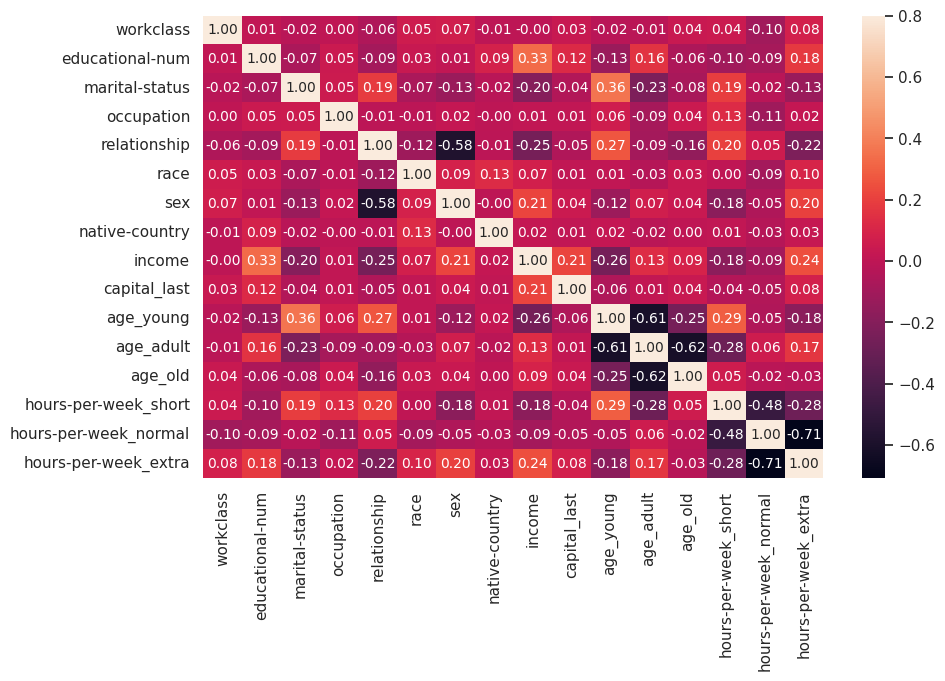

In [ ]:
# Allows simultaneous analysis of the association between variables.
corr = df.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(10, 6))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f')

In [ ]:
#
corr_list = corr['income'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

,income
educational-num,0.332613
hours-per-week_extra,0.243127
sex,0.214628
capital_last,0.214356
age_adult,0.133381
age_old,0.092733
race,0.070934
native-country,0.020073
occupation,0.007275
workclass,-0.000511


# Checking the most important features for the model.

In [ ]:
# Separating the class from the Data.
previsores = df.drop('income',axis=1)
classe = df['income']

In [ ]:
#
clf=RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(previsores, classe)

RandomForestClassifier(random_state=7)

In [ ]:
#
feature_imp = pd.Series(clf.feature_importances_,index=previsores.columns).sort_values(ascending=False)
feature_imp

,0
capital_last,0.227708
educational-num,0.185721
relationship,0.144930
occupation,0.109679
marital-status,0.108843
workclass,0.058868
native-country,0.036384
hours-per-week_extra,0.024598
age_young,0.024525
race,0.023116


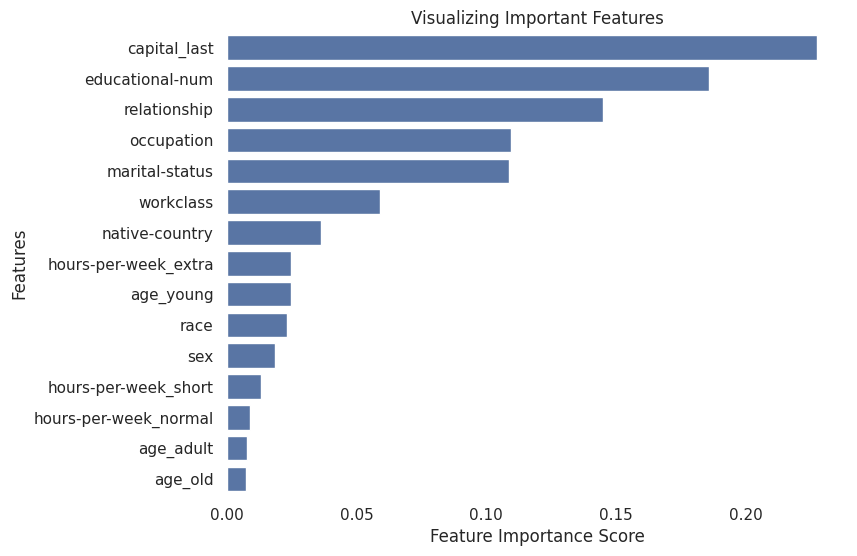

In [ ]:
#
plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
# Selecting the most important features.
features_selected = []
for feature,importance in feature_imp.items():
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)

capital_last: 23%
educational-num: 19%
relationship: 14%
occupation: 11%
marital-status: 11%
workclass: 6%
native-country: 4%


In [ ]:
# Training the models using only the selected features.
previsores = df[features_selected]
classe = df['income']

# Evaluation of Machine Learning models

In [ ]:
# Creating a Machine Learning Model for Each Algorithm

# - The dataset is on different scales, which can harm the performance of some algorithms.

# - Therefore, standardization will be applied to the dataset (putting them on the same scale).

# -In this technique, the data will be transformed so that it has a normal distribution,
# with a mean equal to zero and a standard deviation equal to 1.

pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))),
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))),
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())]))),
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))),
#pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in pipelines:
    kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=7)
    cross_val_result = model_selection.cross_val_score(modelo,
                                                     previsores,
                                                     classe,
                                                     cv = kfold,
                                                     scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-LR: 0.817637 (0.004922)
Scaled-KNN: 0.829614 (0.007016)
Scaled-CART: 0.855698 (0.004088)
Scaled-NB: 0.802977 (0.004809)
Scaled-RF: 0.857848 (0.003937)


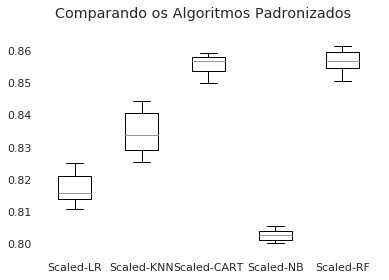

In [ ]:
# According to the previous results, the models created with DecisionTree and Random Forest presented
# the best accuracy values ​​and therefore the best results.
# This can be confirmed by comparing the algorithms through boxplots.
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

# Tuning of models created with Random Forest and Decision Tree.

In [ ]:
# Although the Random Forest showed the lowest error rate after data standardization,
# it can still be optimized by adjusting the parameters.

# Defining scale
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# Possible values ​​of estimators
val_estimators = [20, 50, 100, 150, 200]

# Possible values ​​for the division criterion
val_criterion = ['gini', 'entropy']

# Defining a dictionary that receives the lists of parameters and values
parametros_grid = dict(n_estimators = val_estimators,
                       criterion = val_criterion)


# Creating the model
modelo_random = RandomForestClassifier()

# Defining K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=7)

# Testing different combinations with the parameters
grid = RandomizedSearchCV(estimator = modelo_random, param_distributions = parametros_grid, cv = kfold, scoring = 'accuracy')
grid.fit(previsores, classe)

# Output
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Best parameter:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.85697,std:0.00319,params:{'n_estimators': 20, 'criterion': 'gini'}
mean:0.85754,std:0.00386,params:{'n_estimators': 50, 'criterion': 'gini'}
mean:0.85815,std:0.00333,params:{'n_estimators': 100, 'criterion': 'gini'}
mean:0.85793,std:0.00316,params:{'n_estimators': 150, 'criterion': 'gini'}
mean:0.85815,std:0.0033,params:{'n_estimators': 200, 'criterion': 'gini'}
mean:0.85734,std:0.00306,params:{'n_estimators': 20, 'criterion': 'entropy'}
mean:0.85764,std:0.00357,params:{'n_estimators': 50, 'criterion': 'entropy'}
mean:0.85807,std:0.00271,params:{'n_estimators': 100, 'criterion': 'entropy'}
mean:0.85793,std:0.00322,params:{'n_estimators': 150, 'criterion': 'entropy'}
mean:0.85811,std:0.00304,params:{'n_estimators': 200, 'criterion': 'entropy'}

Melhor parâmetro:{'n_estimators': 100, 'criterion': 'gini'}, Score:0.8581548667130748


In [ ]:
# Ajustar os parâmeros do DecisionTree.

# Definindo a escala
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# Setting the maximum depth of the tree.
max_depth = list(range(1, 31))

# Possible values ​​for the division criterion
val_criterion = ['gini', 'entropy']


# Defining a dictionary that receives the lists of parameters and values
valores_grid = dict(criterion = val_criterion,
                    max_depth = max_depth)

# Creating the model
tree = DecisionTreeClassifier()

# Defining K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=7)

# Testing different combinations with K values
grid = RandomizedSearchCV(estimator = tree, param_distributions = valores_grid, cv = kfold, scoring = 'accuracy')
grid.fit(previsores, classe)

# Output
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.85564,std:0.00319,params:{'max_depth': 30, 'criterion': 'gini'}
mean:0.85594,std:0.003,params:{'max_depth': 29, 'criterion': 'entropy'}
mean:0.85871,std:0.00421,params:{'max_depth': 10, 'criterion': 'gini'}
mean:0.85906,std:0.00417,params:{'max_depth': 11, 'criterion': 'gini'}
mean:0.85543,std:0.00364,params:{'max_depth': 29, 'criterion': 'gini'}
mean:0.84438,std:0.00466,params:{'max_depth': 4, 'criterion': 'entropy'}
mean:0.85959,std:0.00375,params:{'max_depth': 13, 'criterion': 'entropy'}
mean:0.85906,std:0.00339,params:{'max_depth': 15, 'criterion': 'entropy'}
mean:0.76072,std:6e-05,params:{'max_depth': 1, 'criterion': 'gini'}
mean:0.85539,std:0.00329,params:{'max_depth': 28, 'criterion': 'gini'}

Melhor parâmetro:{'max_depth': 13, 'criterion': 'entropy'}, Score:0.8595880594570247


# Finalizing the Model

The model created with DecisionTree showed the best accuracy among all the models created, and therefore will be used in the construction of the final version of the predictive model.


In [ ]:
# Preparing the final version of the model.
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)
modelo_tree = DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=7)
modelo_tree.fit(previsores,classe)
result_tree = cross_val_predict(modelo_tree,previsores, classe, cv=10)

print(f'Acurácia: {accuracy_score(classe,result_tree)}')
print('\n',confusion_matrix(classe,result_tree))
print('\n',classification_report(classe,result_tree))

Acurácia: 0.858789566356824

 [[35055  2100]
 [ 4797  6890]]

               precision    recall  f1-score   support

           0       0.88      0.94      0.91     37155
           1       0.77      0.59      0.67     11687

    accuracy                           0.86     48842
   macro avg       0.82      0.77      0.79     48842
weighted avg       0.85      0.86      0.85     48842



# Saving the Trained Model to Disk

The trained model will be saved to disk for future use. This process involves serializing the model object into a file format that can be easily loaded later.

In [ ]:
#filename = 'model_final.sav'
pickle.dump(modelo_tree, open('modelo.sav', 'wb'))
pickle.load(open('modelo.sav', 'rb'))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')